In [1]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install pandas
!python -m pip install ipywidgets


In [1]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
#команда, которая позволяет отображать графики matplotlib прямо в Jupyter Notebook 
%matplotlib inline 
from scipy import integrate
from ipywidgets import interact
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Создание функций
# Модель с переходом из D в S
def seird_model(t, y, N, a, tau, a_I, a_E, gamma, p, k, rho, beta, mu):
    S, E, I, R, D = y
    dS_dt = - a * (a_I * S * I / N + a_E * S * E / N) + gamma * D
    dE_dt = a *(a_I * S * I / N + a_E * S * E / N) - (p * k + (1 - p) * rho) * E
    dI_dt = p * k * E - beta * I - mu * I
    dR_dt = beta * I + (1 - p) * rho * E
    dD_dt = mu * I - gamma * D
    return dS_dt, dE_dt, dI_dt, dR_dt, dD_dt
    
def interact_sir(a=1, tau=1, a_I=.5, a_E=.5, gamma=.25, p=.5,
                 k=.5, rho=.1, beta=.1, mu=.1):
    
    T = 150 # Время моделирования 
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I, a_E, gamma,
                                                       p, k, rho, beta, mu),
                              [0, T], [S0, E0, I0, R0, D0], dense_output=True)
    t = np.linspace(0, T, T)
    y = sol.sol(t)
    S, E, I, R, D = y[0, :], y[1, :], y[2, :], y[3, :], y[4, :]
    plt.plot(t, S, color='b', label='S - Восприимчивые')
    plt.plot(t, E, color='m', label='E - Обдумывающие')
    plt.plot(t, I, color='r', label='I - Дезинформированные распространители')
    plt.plot(t, R, color='g', label='R - Невосприимчивые')
    plt.plot(t, D, color='k', label='D - Обнулившиеся')
    plt.xlabel('t - Время')
    plt.ylabel('N - Популяция')
    plt.legend()
    plt.grid()
    plt.show()

Придумать как создать аргумент а(т-тау), я думаю стоит 

In [3]:
# Начальные параметры
N = 200000 
p = .5 
a = 1   
tau = 1    
rho = .1 
beta = .1  
gamma = .25 
mu = .1   
a_I = .5  
a_E = .5
k = .5
E0 = 0
I0 = 100
R0 = 0
D0 = 0
S0 = N - E0 - I0 - R0 - D0

In [4]:
interact(interact_sir, a=(0, 1, .01),
         a_I=(0, 1, .01), a_E=(0, 1, .01), 
         gamma=(0, 1, .01), p=(0, 1, .01), k=(0, 1, .01), 
         rho=(0, 1, .01), beta=(0, 1, .01), mu=(0, 1, .01))

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, step=0.01), IntSlider(value=1, descript…

<function __main__.interact_sir(a=1, tau=1, a_I=0.5, a_E=0.5, gamma=0.25, p=0.5, k=0.5, rho=0.1, beta=0.1, mu=0.1)>

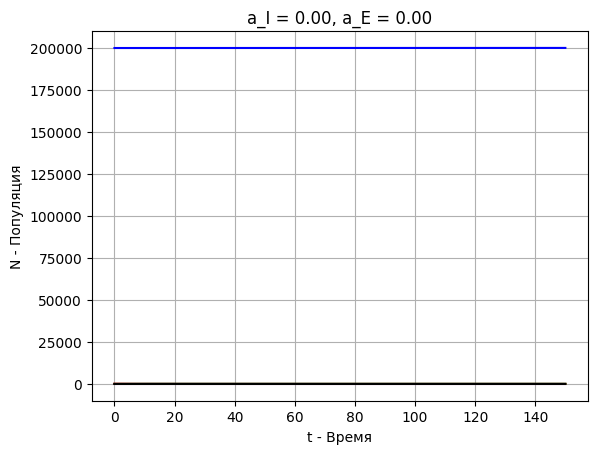

In [6]:
def animate(i, t, ax):
    a_I_val = 0.0 + i * 0.02
    a_E_val = 0.0 + i * 0.02
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I_val, a_E_val, gamma,
                                                       p, k, rho, beta, mu),
                              [0, T], [S0, E0, I0, R0, D0], dense_output=True)
    y = sol.sol(t)
    S, E, I, R, D = y[0, :], y[1, :], y[2, :], y[3, :], y[4, :]

    ax.clear()
    ax.plot(t, S, color='b', label='S - Восприимчивые')
    ax.plot(t, E, color='m', label='E - Обдумывающие')
    ax.plot(t, I, color='r', label='I - Дезинформированные распространители')
    ax.plot(t, R, color='g', label='R - Невосприимчивые')
    ax.plot(t, D, color='k', label='D - Обнулившиеся')
    ax.set_xlabel('t - Время')
    ax.set_ylabel('N - Популяция')
    ax.set_title(f'a_I = {a_I_val:.2f}, a_E = {a_E_val:.2f}')
    plt.grid()

# Определение временного массива
T = 150
t = np.linspace(0, T, 1000)

# Инициализация
fig, ax = plt.subplots()

# Создание анимации
ani = FuncAnimation(fig, animate, frames=50, interval=100, repeat=False, fargs=(t, ax))

# Отображение анимации в Jupyter Notebook
HTML(ani.to_jshtml())

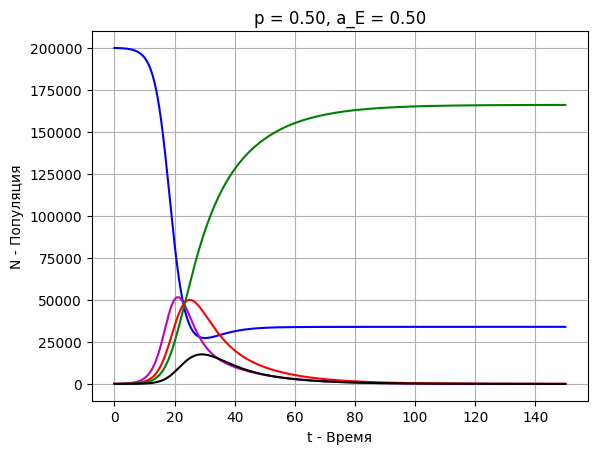

In [7]:
def animate(i, t, ax):
    p_val = max(0, min(1, 0.5 + i * 0.01))
    a_E_val = max(0, min(1, 0.5 - i * 0.01))
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I, a_E_val, gamma,
                                                       p_val, k, rho, beta, mu),
                              [0, T], [S0, E0, I0, R0, D0], dense_output=True)
    y = sol.sol(t)
    S, E, I, R, D = y[0, :], y[1, :], y[2, :], y[3, :], y[4, :]

    ax.clear()
    ax.plot(t, S, color='b', label='S - Восприимчивые')
    ax.plot(t, E, color='m', label='E - Обдумывающие')
    ax.plot(t, I, color='r', label='I - Дезинформированные распространители')
    ax.plot(t, R, color='g', label='R - Невосприимчивые')
    ax.plot(t, D, color='k', label='D - Обнулившиеся')
    ax.set_xlabel('t - Время')
    ax.set_ylabel('N - Популяция')
    ax.set_title(f'p = {p_val:.2f}, a_E = {a_E_val:.2f}')
    plt.grid()

# Определение временного массива
T = 150
t = np.linspace(0, T, 1000)

# Инициализация
fig, ax = plt.subplots()

# Создание анимации
ani = FuncAnimation(fig, animate, frames=50, interval=100, repeat=False, fargs=(t, ax))

# Отображение анимации в Jupyter Notebook
HTML(ani.to_jshtml())

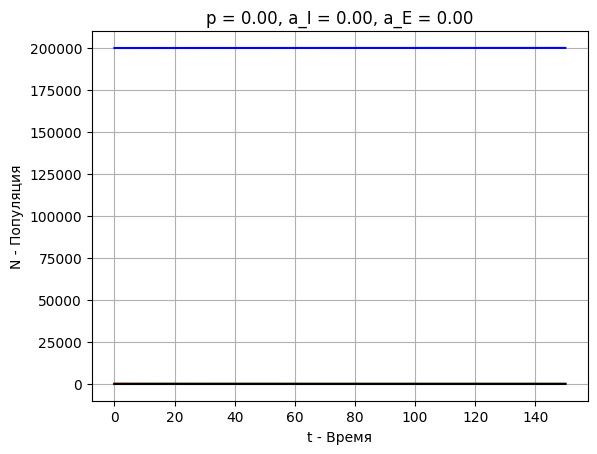

In [8]:
# Образец изменения параметров (настройка анимации) 

def animate(i, t, ax):
    # Ввод параметров (любое количество до количества параметров в S(-E)IR(-D)_model В нашем случае ~ 10)
    # Лучше вводить новые переменные вместо "p" -> "p_val" or "p_value", но это не обязательно
    p = max(0, min(1, 0.0 + i * 0.02))
    a_I_val = max(0, min(1, 0.0 + i * 0.02))
    a_E_val = max(0, min(1, 0.0 + i * 0.02))
    # Здесь мы пишем изменённые переменные в sol = ... 
    sol = integrate.solve_ivp(lambda t, y: seird_model(t, y, N, a, tau, a_I_val, a_E_val, gamma,
                                                       p, k, rho, beta, mu),
                              [0, T], [S0, E0, I0, R0, D0], dense_output=True)
    y = sol.sol(t)
    S, E, I, R, D = y[0, :], y[1, :], y[2, :], y[3, :], y[4, :]

    ax.clear()
    ax.plot(t, S, color='b', label='S - Восприимчивые')
    ax.plot(t, E, color='m', label='E - Обдумывающие')
    ax.plot(t, I, color='r', label='I - Дезинформированные распространители')
    ax.plot(t, R, color='g', label='R - Невосприимчивые')
    ax.plot(t, D, color='k', label='D - Обнулившиеся')
    ax.set_xlabel('t - Время')
    ax.set_ylabel('N - Популяция')
    # данная строчка просто пишет сверху параметры и их значения в каждый момент
    ax.set_title(f'p = {p:.2f}, a_I = {a_I_val:.2f}, a_E = {a_E_val:.2f}')
    plt.grid()


# Определение временного массива
T = 150
t = np.linspace(0, T, 1000)

# Инициализация
fig, ax = plt.subplots()

# Создание анимации, frames=50 количество кадров, interval=100 скорость анимации 
ani = FuncAnimation(fig, animate, frames=55, interval=150, repeat=False, fargs=(t, ax))

# Отображение анимации в Jupyter Notebook
HTML(ani.to_jshtml())

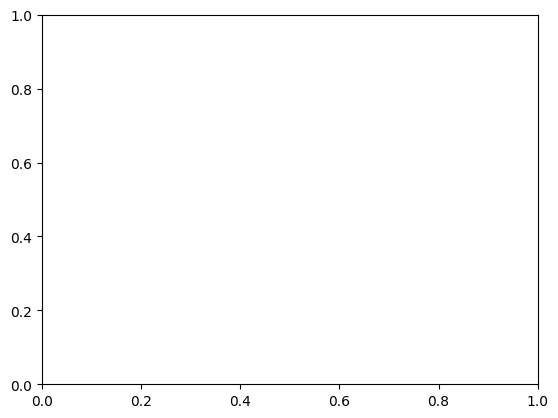

In [19]:
# Сохранение анимации
ani.save('animation_SEIRD.gif', writer='pillow', fps=15)